## Importing Required Modules/Libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding , Dense , Dropout , LSTM , Bidirectional
from tensorflow.keras.regularizers import L2

print(tf.__version__)

2.3.1


### Reading Data from dataset

In [6]:
data = open('shakespeare_data.txt' , 'rt').read().lower().split("\n")

### Init Tokenizer and fitting on dataset

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1
total_words

3211

### Creating Input Sequences

In [8]:
input_sequences = []
for line in data:
  token_list=  tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequences = token_list[:i+1]
    input_sequences.append(n_gram_sequences)

## Creating Padded Sequences

In [9]:
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences , padding = 'pre' , maxlen = max_seq_len)
input_sequences = np.asarray(input_sequences)
input_sequences.shape

(15462, 11)

In [10]:
X = input_sequences[: , :-1]
y = input_sequences[: , -1]
print(X.shape , y.shape)
y_label = to_categorical(y , num_classes = total_words)

(15462, 10) (15462,)


### Creating DNN Model

In [11]:
model = Sequential()
model.add(Embedding(total_words , 128))
model.add(Bidirectional(LSTM(128 , activation = 'relu' , return_sequences=True)))
model.add(Dropout(0.8))
model.add(Bidirectional(LSTM(256 , activation = 'relu')))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(total_words , activation = 'softmax'))
# Pick an optimizer
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         411008    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              1647243   
Total params: 3,634,699
Trainable params: 3,634,699
Non-trainable params: 0
______________________________________________

### Compiling the model

In [12]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

### Summary of the Model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         411008    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              1647243   
Total params: 3,634,699
Trainable params: 3,634,699
Non-trainable params: 0
______________________________________________

### Fitting the model on data

In [14]:
history = model.fit(
    X,
    y_label,
    epochs = 100,
)

Epoch 1/100
484/484 [==============================] - 31s 63ms/step - loss: 6.8793 - accuracy: 0.0224
Epoch 2/100
484/484 [==============================] - 31s 65ms/step - loss: 6.5197 - accuracy: 0.0225
Epoch 3/100
484/484 [==============================] - 32s 66ms/step - loss: 6.3898 - accuracy: 0.0258
Epoch 4/100
484/484 [==============================] - 31s 64ms/step - loss: 6.2647 - accuracy: 0.0301
Epoch 5/100
484/484 [==============================] - 32s 65ms/step - loss: 6.1613 - accuracy: 0.0358
Epoch 6/100
484/484 [==============================] - 30s 62ms/step - loss: 6.0521 - accuracy: 0.0407
Epoch 7/100
484/484 [==============================] - 29s 60ms/step - loss: 5.9160 - accuracy: 0.0492
Epoch 8/100
484/484 [==============================] - 31s 64ms/step - loss: 5.7605 - accuracy: 0.0552
Epoch 9/100
484/484 [==============================] - 30s 61ms/step - loss: 5.6021 - accuracy: 0.0612
Epoch 10/100
484/484 [==============================] - 28s 59ms/step - l

484/484 [==============================] - 34s 71ms/step - loss: 1.3323 - accuracy: 0.6362
Epoch 79/100
484/484 [==============================] - 31s 65ms/step - loss: 1.3052 - accuracy: 0.6376
Epoch 80/100
484/484 [==============================] - 31s 64ms/step - loss: 1.2940 - accuracy: 0.6467
Epoch 81/100
484/484 [==============================] - 32s 65ms/step - loss: 1.2410 - accuracy: 0.6583
Epoch 82/100
484/484 [==============================] - 31s 64ms/step - loss: 1.2565 - accuracy: 0.6502
Epoch 83/100
484/484 [==============================] - 31s 64ms/step - loss: 1.2532 - accuracy: 0.6528
Epoch 84/100
484/484 [==============================] - 31s 64ms/step - loss: 1.2472 - accuracy: 0.6522
Epoch 85/100
484/484 [==============================] - 31s 64ms/step - loss: 1.2355 - accuracy: 0.6603
Epoch 86/100
484/484 [==============================] - 31s 64ms/step - loss: 1.2142 - accuracy: 0.6638
Epoch 87/100
484/484 [==============================] - 32s 66ms/step - loss:

## Analysing Loss and Accuracy over epochs 

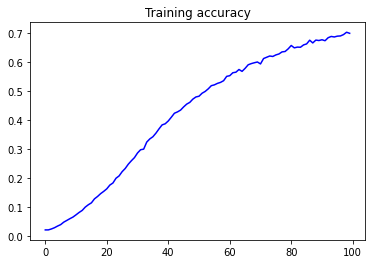

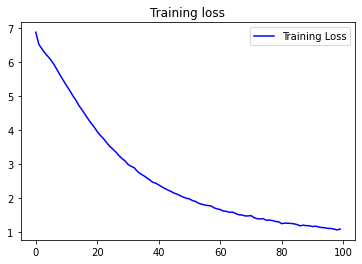

In [23]:
 import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

### Testing The Model , Shakespeare Poetry!

In [58]:
seed_str = "Hello my name is Luke"

for _ in range(1000):
	token_list = tokenizer.texts_to_sequences([seed_str])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_str += " " + output_word
print(seed_str)

Hello my name is Luke fairest bare in high but to one behind her away thy granting bail shall lose both both and that doth one still new 'will ' old thy ' eyes thy 'will' enjoys it inhearse be bow bow woe lips go doth woe shall you can sit ill hate i know in thee so not behold thee so made so not so old so so made to me due of thee doth keep her wantonness told it bow bow woe ill go woe ill in thee doth foes say so long lies see good ' thee more more more are fled so took forth all thy grief ' shine bright forth so near shown bow bow lie my dear where in my rhyme truth of such hate dost in you say so more lies so so so made to one ever to me shown seen told in kings bow bow bent your deeds to night before razed prove torn both land rolling bent fullness with new lie me back to doubt thee not that in me that love i bold can bold writ me true dearer more more in their tongue shall still shine bright forth night to night of night away afloat rolling rolling rolling rolling rolling rolling